## Homework 2

Library Importing and Data Reading Stage
-Importing pandas library
-Importing numpy library 
-Importing matplot library

-Reading data file, obtaining the shape, and printing data for personal reviewal

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Data = pd.read_csv('data.csv')

Data.shape 

Data



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1


Develop vector values for x (each individual test) and y (binary status of 0 or 1) data

In [14]:
X = Data.loc[:, 'MDVP:Fo(Hz)':'PPE'].values
y =Data.loc[:, 'status'].values



Split the test data 80/20
-test size 20%
-straification
-assign a random state number

In [15]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=6938)

Obtain functions from sklearn 
-StandardScaler
-PCA
-KNeighborsClassifier 
-pipeline formation

pipe_K is the pipeline variable that will encompass scaling the learning algorithm (k nearest neighbors)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

pipe_K = make_pipeline(StandardScaler(),PCA(n_components=2),KNeighborsClassifier())

Prediction of test Accuracy 

In [19]:
pipe_K.fit(X_train, y_train)
y_pred = pipe_K.predict(X_test)
print('Test Accuracy: %.3f' % pipe_K.score(X_test, y_test))

Test Accuracy: 0.872


Utilizing grid search to obtain the best parameter. In this case, <b>the optimal k value from 4-10, is 9.</b> 

In [21]:
from sklearn.grid_search import GridSearchCV


k = [4,5,6,7,8,9,10] 
param_grid = [{'kneighborsclassifier__n_neighbors': k}]

gs = GridSearchCV(estimator=pipe_K, param_grid=param_grid, scoring='accuracy', cv=5)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


0.8717948717948718
{'kneighborsclassifier__n_neighbors': 9}


Importing the learning curve function from sklearn to develop a plot that depicts training and validation accuracy through the usage of 5-fold cross validation.

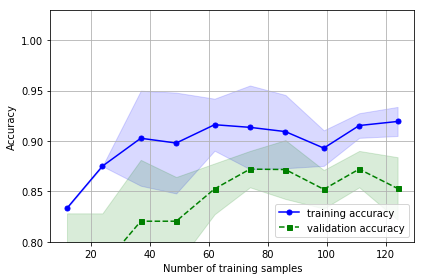

In [22]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_K,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

In [23]:
print(np.average(train_scores))

print(np.average(test_scores))

0.8975539538016766
0.8378749999999999


Importing the validation curve function from sklearn to develop a plot that depicts training and validation accuracy through the usage of 5-fold cross validation.

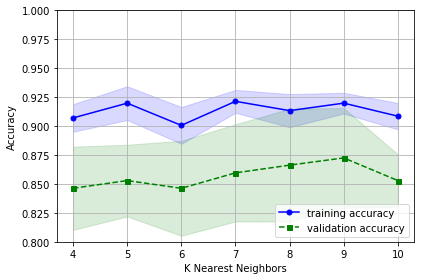

In [24]:
from sklearn.model_selection import validation_curve


train_scores, test_scores = validation_curve(
                estimator=pipe_K, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=k,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(k, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(k, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(k, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(k, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
#plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

Final Averages for Training and Testing scores:

In [26]:
print('Training Scores')
print(np.average(train_scores))
print('Testing Scores')
print(np.average(test_scores))

Training Scores
0.9129544290834612
Testing Scores
0.8566666666666667
